In [1]:
import os
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from copy import deepcopy
# from google.colab import drive
# drive.mount('/content/gdrive')
print(os.getcwd())
if os.getcwd().split("/")[-1] == "Covid_19_predictor":
  print("Current working directory is already Covid_19_predictor")
elif os.path.isdir("Covid_19_predictor"):
  print("Covid_19_predictor already Exists")
else:
  ! git clone https://github.com/saahil-jain/Covid_19_predictor.git

/content
Covid_19_predictor already Exists


In [2]:
if os.path.isdir("Covid_19_predictor"):
  % cd Covid_19_predictor
! git pull

/content/Covid_19_predictor
Already up to date.


In [3]:
df=pd.read_csv("data.csv")
df.head()

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2018,continentExp
0,05/06/2020,5,6,2020,787,6,Afghanistan,AF,AFG,37172386.0,Asia
1,04/06/2020,4,6,2020,758,24,Afghanistan,AF,AFG,37172386.0,Asia
2,03/06/2020,3,6,2020,759,5,Afghanistan,AF,AFG,37172386.0,Asia
3,02/06/2020,2,6,2020,545,8,Afghanistan,AF,AFG,37172386.0,Asia
4,01/06/2020,1,6,2020,680,8,Afghanistan,AF,AFG,37172386.0,Asia


In [0]:
grouped=df.groupby('countriesAndTerritories')
countries=sorted(list(set(df.countriesAndTerritories.unique())))
countries
country_population = {}
for country in countries:
  country_population[country]=set(grouped.get_group(country)['popData2018'])
countries_to_remove = ["Cases_on_an_international_conveyance_Japan", "Holy_See"]
for country in countries:
  if len(country_population[country])>1 :
    countries_to_remove.append(country)
for country in countries_to_remove:
  del country_population[country]
  countries.remove(country)

country_population = {}
for country in countries:
  country_population[country]=list(grouped.get_group(country)['popData2018'])[0]
#for country in countries:
#    print("{0:45s}".format(country), country_population[country])


In [0]:
country_wise_cases=dict()
country_wise_deaths=dict()
normalised_country_wise_cases=dict()
normalised_country_wise_deaths=dict()
for country in countries:
  country_wise_cases[country]=list(grouped.get_group(country)['cases'])[::-1]
  country_wise_deaths[country]=list(grouped.get_group(country)['deaths'])[::-1]
for country in countries:
  for index in range(len(country_wise_cases[country])):
    country_wise_cases[country][index] = abs(country_wise_cases[country][index])
    country_wise_deaths[country][index] = abs(country_wise_deaths[country][index])

for country in countries:
  leading_zero_count = 0
  for index in range(len(country_wise_cases[country])):
    if country_wise_cases[country][index] == 0:
      leading_zero_count += 1
    else:
      country_wise_cases[country] = country_wise_cases[country][leading_zero_count:]
      country_wise_deaths[country] = country_wise_deaths[country][leading_zero_count:]
      break


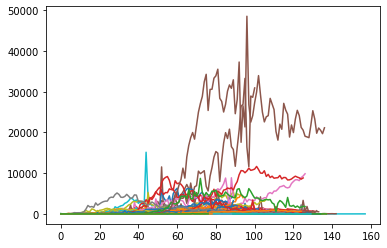

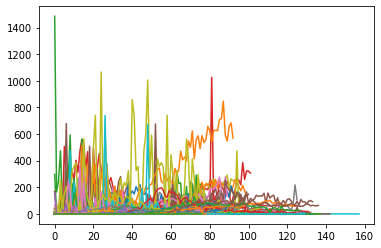

In [6]:
for country in countries:
  graph=plt.plot(country_wise_cases[country])
  # plt.legend(countries,loc='lower left')
plt.show()
for country in countries:
  normalised_country_wise_cases[country] = deepcopy(country_wise_cases[country])
  for index in range(len(country_wise_cases[country])):
    normalised_country_wise_cases[country][index] = normalised_country_wise_cases[country][index] * 1_000_000 / country_population[country]
  graph=plt.plot(normalised_country_wise_cases[country])
  # plt.legend(countries,loc='lower left')
plt.show()

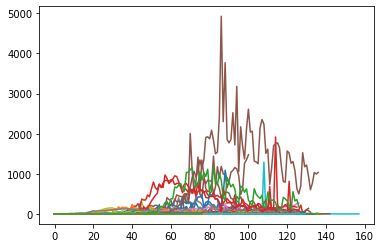

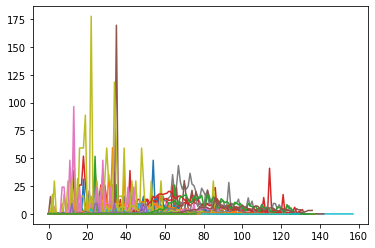

In [7]:
for country in countries:
  graph=plt.plot(country_wise_deaths[country])
  # plt.legend(countries,loc='lower left')
plt.show()

for country in countries:
  normalised_country_wise_deaths[country] = deepcopy(country_wise_deaths[country])
  for index in range(len((country_wise_deaths[country]))):
    normalised_country_wise_deaths[country][index] = normalised_country_wise_deaths[country][index] * 1_000_000 / country_population[country]
  graph=plt.plot(normalised_country_wise_deaths[country])
  # plt.legend(countries,loc='lower left')
plt.show()

In [0]:
cummulative_country_wise_cases=dict()
cummulative_country_wise_deaths=dict()
normalised_cummulative_country_wise_cases=dict()
normalised_cummulative_country_wise_deaths=dict()

for country in countries:
  cummulative_country_wise_cases[country] = []
  cummulative_country_wise_deaths[country] = []
  cummulative_cases = 0
  cummulative_death = 0
  normalised_cummulative_country_wise_cases[country] = []
  normalised_cummulative_country_wise_deaths[country] = []
  normalised_cummulative_cases = 0
  normalised_cummulative_death = 0
  total_days = len(country_wise_cases[country])
  for index in range(total_days):
    cummulative_cases += country_wise_cases[country][index]
    cummulative_death += country_wise_deaths[country][index]
    cummulative_country_wise_cases[country].append(cummulative_cases)
    cummulative_country_wise_deaths[country].append(cummulative_death)
    normalised_cummulative_cases += normalised_country_wise_cases[country][index]
    normalised_cummulative_death += normalised_country_wise_deaths[country][index]
    normalised_cummulative_country_wise_cases[country].append(normalised_cummulative_cases)
    normalised_cummulative_country_wise_deaths[country].append(normalised_cummulative_death)

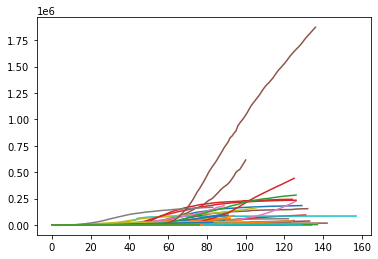

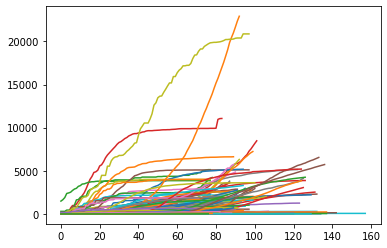

In [9]:
for country in countries:
  graph=plt.plot(cummulative_country_wise_cases[country])
  # plt.legend(countries,loc='lower left')
plt.show()
for country in countries:
  graph=plt.plot(normalised_cummulative_country_wise_cases[country])
  # plt.legend(countries,loc='lower left')
plt.show()

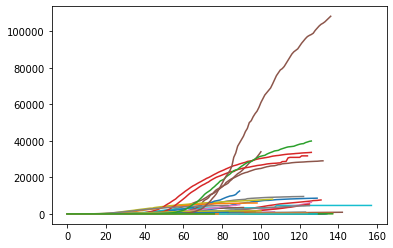

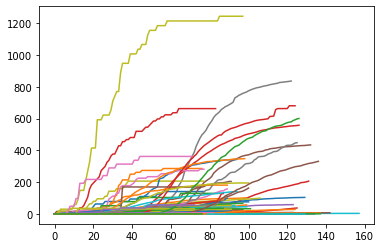

In [10]:
for country in countries:
  graph=plt.plot(cummulative_country_wise_deaths[country])
  # plt.legend(countries,loc='lower left')
plt.show()
for country in countries:
  graph=plt.plot(normalised_cummulative_country_wise_deaths[country])
  # plt.legend(countries,loc='lower left')
plt.show()

In [11]:
for country in countries:
  print("{0:45s}".format(country),"{0:10d}".format(cummulative_country_wise_cases[country][-1]),"{0:10d}".format(cummulative_country_wise_deaths[country][-1]))


Afghanistan                                        18054        300
Albania                                             1197         33
Algeria                                             9831        681
Andorra                                              852         51
Angola                                                86          4
Antigua_and_Barbuda                                   26          3
Argentina                                          19255        588
Armenia                                            11221        176
Aruba                                                101          3
Australia                                           7240        102
Austria                                            16741        670
Azerbaijan                                          6522         78
Bahamas                                              102         11
Bahrain                                            13296         21
Bangladesh                                      

In [12]:
#code to generate a list of top 15 countries with highest cummulative deaths and cases.
#generates two lists of countries which are sorted in descending order based on the cases/deaths
#adjust value of slicing to get top 10/20.
top_n = 10
countries_and_cases=[]
countries_and_deaths=[]

for country,cumm_cases in zip(cummulative_country_wise_cases.keys(),cummulative_country_wise_cases.values()):
  countries_and_cases.append([country,cumm_cases[-1]])
countries_and_cases=sorted(countries_and_cases,key=lambda x:x[1],reverse=True)
top_n_cases=list(map(lambda x:x[0],countries_and_cases))[:top_n]


for country,cumm_deaths in zip(cummulative_country_wise_deaths.keys(),cummulative_country_wise_deaths.values()):
  countries_and_deaths.append([country,cumm_deaths[-1]])
countries_and_deaths=sorted(countries_and_deaths,key=lambda x:x[1],reverse=True)

top_n_deaths=list(map(lambda x:x[0],countries_and_deaths))[:top_n]

print("{0:45s}".format("Total Cases"), "{0:45s}".format("Total Deaths"), end="\n\n")
for index in range(top_n):
  print("{0:45s}".format(top_n_cases[index]), "{0:45s}".format(top_n_deaths[index]))


def intersection(lst1, lst2): 
    return list(set(lst1) & set(lst2)) 
training_countries = list(intersection(top_n_cases, top_n_deaths))
training_countries.append("India")
training_countries.remove("Brazil")
print(training_countries) 

Total Cases                                   Total Deaths                                 

United_States_of_America                      United_States_of_America                     
Brazil                                        United_Kingdom                               
Russia                                        Brazil                                       
United_Kingdom                                Italy                                        
Spain                                         Spain                                        
Italy                                         France                                       
India                                         Mexico                                       
Germany                                       Belgium                                      
Peru                                          Germany                                      
Turkey                                        Iran                             

In [13]:
plt.style.use('seaborn-whitegrid')
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout, GRU, Bidirectional, SimpleRNN
from keras.optimizers import SGD
import math
from sklearn.metrics import mean_squared_error

def return_rmse(test,predicted):
    rmse = math.sqrt(mean_squared_error(test, predicted))
    print("The root mean squared error is {}.".format(rmse))

Using TensorFlow backend.


In [0]:
base_data_cases = normalised_country_wise_cases
base_data_deaths = normalised_country_wise_deaths

def split(dataframe, split_factor):
  base_data = {}
  for country in training_countries:
    base_data[country] = {}
    country_data_length = len(dataframe[country])
    split_index = int(math.floor(country_data_length * split_factor))
    base_data[country]["Train"] = dataframe[country][:split_index]
    base_data[country]["Test"] = dataframe[country][split_index:]
  return base_data

split_factor = 0.8

transform_train_cases = {}
transform_test_cases = {}
scaler_cases = {}
data_cases = split(base_data_cases, split_factor)
for num, country in enumerate(training_countries):
    sc = MinMaxScaler(feature_range=(0,1))
    a0 = np.array(data_cases[country]["Train"])
    a1 = np.array(data_cases[country]["Test"])
    a0 = a0.reshape(a0.shape[0],1)
    a1 = a1.reshape(a1.shape[0],1)
    transform_train_cases[country] = sc.fit_transform(a0)
    transform_test_cases[country] = sc.fit_transform(a1)
    scaler_cases[country] = sc
del a0
del a1

transform_train_deaths = {}
transform_test_deaths = {}
scaler_deaths = {}
data_deaths = split(base_data_deaths, split_factor)
for num, country in enumerate(training_countries):
    sc = MinMaxScaler(feature_range=(0,1))
    a0 = np.array(data_deaths[country]["Train"])
    a1 = np.array(data_deaths[country]["Test"])
    a0 = a0.reshape(a0.shape[0],1)
    a1 = a1.reshape(a1.shape[0],1)
    transform_train_deaths[country] = sc.fit_transform(a0)
    transform_test_deaths[country] = sc.fit_transform(a1)
    scaler_deaths[country] = sc
del a0
del a1

In [15]:
for i in transform_train_cases.keys():
    print(i, transform_train_cases[i].shape)
print("\n")    
for i in transform_test_cases.keys():
    print(i, transform_test_cases[i].shape)
 
print("\n")    
for i in transform_train_deaths.keys():
    print(i, transform_train_deaths[i].shape)
print("\n")    
for i in transform_test_deaths.keys():
    print(i, transform_test_deaths[i].shape)

Spain (100, 1)
United_States_of_America (109, 1)
Italy (101, 1)
United_Kingdom (101, 1)
Germany (104, 1)
India (101, 1)


Spain (25, 1)
United_States_of_America (28, 1)
Italy (26, 1)
United_Kingdom (26, 1)
Germany (26, 1)
India (26, 1)


Spain (100, 1)
United_States_of_America (109, 1)
Italy (101, 1)
United_Kingdom (101, 1)
Germany (104, 1)
India (101, 1)


Spain (25, 1)
United_States_of_America (28, 1)
Italy (26, 1)
United_Kingdom (26, 1)
Germany (26, 1)
India (26, 1)


In [0]:
trainset_cases = {}
testset_cases = {}
look_back_cases = 3
for country in training_countries:
    trainset_cases[country] = {}
    X_train = []
    y_train = []
    for i in range(look_back_cases,100):
        X_train.append(transform_train_cases[country][i-look_back_cases:i,0])
        y_train.append(transform_train_cases[country][i,0])
    X_train, y_train = np.array(X_train), np.array(y_train)
    trainset_cases[country]["X"] = np.reshape(X_train, (X_train.shape[0],X_train.shape[1],1))
    trainset_cases[country]["y"] = y_train
    
    testset_cases[country] = {}
    X_test = []
    y_test = []    
    for i in range(look_back_cases, 25):
        X_test.append(transform_test_cases[country][i-look_back_cases:i,0])
        y_test.append(transform_test_cases[country][i,0])
    X_test, y_test = np.array(X_test), np.array(y_test)
    testset_cases[country]["X"] = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))
    testset_cases[country]["y"] = y_test

trainset_deaths = {}
testset_deaths = {}
look_back_deaths = 3
for country in training_countries:
    trainset_deaths[country] = {}
    X_train = []
    y_train = []
    for i in range(look_back_deaths,100):
        X_train.append(transform_train_deaths[country][i-look_back_deaths:i,0])
        y_train.append(transform_train_deaths[country][i,0])
    X_train, y_train = np.array(X_train), np.array(y_train)
    trainset_deaths[country]["X"] = np.reshape(X_train, (X_train.shape[0],X_train.shape[1],1))
    trainset_deaths[country]["y"] = y_train
    
    testset_deaths[country] = {}
    X_test = []
    y_test = []    
    for i in range(look_back_deaths, 25):
        X_test.append(transform_test_deaths[country][i-look_back_deaths:i,0])
        y_test.append(transform_test_deaths[country][i,0])
    X_test, y_test = np.array(X_test), np.array(y_test)
    testset_deaths[country]["X"] = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))
    testset_deaths[country]["y"] = y_test

In [17]:
arr_buff_cases = []
for country in training_countries:
    buff = {}
    buff["X_train"] = trainset_cases[country]["X"].shape
    buff["y_train"] = trainset_cases[country]["y"].shape
    buff["X_test"] = testset_cases[country]["X"].shape
    buff["y_test"] = testset_cases[country]["y"].shape
    arr_buff_cases.append(buff)

pd.DataFrame(arr_buff_cases, index=training_countries)

arr_buff_deaths = []
for country in training_countries:
    buff = {}
    buff["X_train"] = trainset_deaths[country]["X"].shape
    buff["y_train"] = trainset_deaths[country]["y"].shape
    buff["X_test"] = testset_deaths[country]["X"].shape
    buff["y_test"] = testset_deaths[country]["y"].shape
    arr_buff_deaths.append(buff)

pd.DataFrame(arr_buff_deaths, index=training_countries)

,X_train,y_train,X_test,y_test
Spain,"(97, 3, 1)","(97,)","(22, 3, 1)","(22,)"
United_States_of_America,"(97, 3, 1)","(97,)","(22, 3, 1)","(22,)"
Italy,"(97, 3, 1)","(97,)","(22, 3, 1)","(22,)"
United_Kingdom,"(97, 3, 1)","(97,)","(22, 3, 1)","(22,)"
Germany,"(97, 3, 1)","(97,)","(22, 3, 1)","(22,)"
India,"(97, 3, 1)","(97,)","(22, 3, 1)","(22,)"


In [0]:
total_error = dict()
model_types = ["RNN","LSTM", "GRU", "NODE"]
for model_type in model_types:
  total_error[model_type] = dict()
  total_error[model_type]["Cases"] = 0
  total_error[model_type]["Deaths"] = 0
  
def lagging(df, lag):
    df_pred = pd.Series(df["Pred"].reshape(-1))
    df_true = pd.Series(df["True"].reshape(-1))
    
    df_pred_lag = df_pred.shift(lag)
    
    # print("MSE without Lag :", mean_squared_error(np.array(df_true), np.array(df_pred)))
    MSE_lag = mean_squared_error(np.array(df_true[:-lag]), np.array(df_pred_lag[:-lag]))
    print("MSE with Lag    :", MSE_lag)

    # plt.figure(figsize=(14,4))
    # plt.title("Prediction without Lag")
    # plt.plot(df_true, color='green')
    # plt.plot(df_pred, color='blue')
    # plt.legend(["True", "Predicted"])

    plt.figure(figsize=(14,4))
    plt.title("Prediction with Lag")
    plt.plot(df_true, color='green')
    plt.plot(df_pred_lag, color='blue')
    plt.legend(["True", "Predicted"])

    return MSE_lag


Fitting to Spain
Epoch 1/1
97/97 [==============================] - 1s 8ms/step - loss: 0.5122
Fitting to United_States_of_America
Epoch 1/1
97/97 [==============================] - 0s 883us/step - loss: 0.3226
Fitting to Italy
Epoch 1/1
97/97 [==============================] - 0s 826us/step - loss: 0.3694
Fitting to United_Kingdom
Epoch 1/1
97/97 [==============================] - 0s 840us/step - loss: 0.2436
Fitting to Germany
Epoch 1/1
97/97 [==============================] - 0s 811us/step - loss: 0.1891
Fitting to India
Epoch 1/1
97/97 [==============================] - 0s 820us/step - loss: 0.0954
Fitting to Spain
Epoch 1/1
97/97 [==============================] - 0s 809us/step - loss: 0.1617
Fitting to United_States_of_America
Epoch 1/1
97/97 [==============================] - 0s 833us/step - loss: 0.1231
Fitting to Italy
Epoch 1/1
97/97 [==============================] - 0s 883us/step - loss: 0.1997
Fitting to United_Kingdom
Epoch 1/1
97/97 [==============================] - 0s 

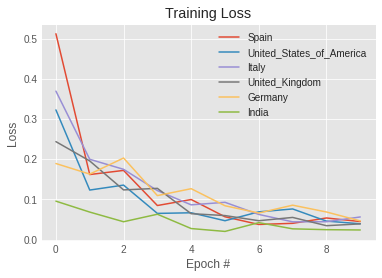

In [19]:
%%time
epochs = 10
# The RNN architecture
regressorRNN_cases = Sequential()
# First RNN layer with Dropout regularisation
regressorRNN_cases.add(SimpleRNN(units=50, return_sequences=True, input_shape=(look_back_cases,1)))
regressorRNN_cases.add(Dropout(0.2))
# Second RNN layer
regressorRNN_cases.add(SimpleRNN(units=50, return_sequences=True))
regressorRNN_cases.add(Dropout(0.2))
# Third RNN layer
regressorRNN_cases.add(SimpleRNN(units=50, return_sequences=True))
regressorRNN_cases.add(Dropout(0.5))
# Fourth RNN layer
regressorRNN_cases.add(SimpleRNN(units=50))
regressorRNN_cases.add(Dropout(0.5))
# The output layer
regressorRNN_cases.add(Dense(units=1))

# Compiling the RNN
regressorRNN_cases.compile(optimizer='rmsprop', loss='mean_squared_error')
# Fitting to the training set
history_cases = {}
for country in training_countries:
  history_cases[country] = []
for epoch in range(epochs):
    for country in training_countries:
        print("Fitting to", country)
        H = regressorRNN_cases.fit(trainset_cases[country]["X"], trainset_cases[country]["y"], epochs=1, batch_size=16)
        history_cases[country].append(H.history["loss"])
print(history_cases)


plt.style.use("ggplot")
plt.figure()
for country in training_countries:
  plt.plot(np.arange(0, epochs), history_cases[country], label=country)
plt.title("Training Loss")
plt.xlabel("Epoch #")
plt.ylabel("Loss")
plt.legend(loc="upper right")

Fitting to Spain
Epoch 1/1
97/97 [==============================] - 1s 6ms/step - loss: 0.2340
Fitting to United_States_of_America
Epoch 1/1
97/97 [==============================] - 0s 835us/step - loss: 0.1955
Fitting to Italy
Epoch 1/1
97/97 [==============================] - 0s 791us/step - loss: 0.2462
Fitting to United_Kingdom
Epoch 1/1
97/97 [==============================] - 0s 809us/step - loss: 0.3507
Fitting to Germany
Epoch 1/1
97/97 [==============================] - 0s 939us/step - loss: 0.2456
Fitting to India
Epoch 1/1
97/97 [==============================] - 0s 834us/step - loss: 0.0810
Fitting to Spain
Epoch 1/1
97/97 [==============================] - 0s 858us/step - loss: 0.2933
Fitting to United_States_of_America
Epoch 1/1
97/97 [==============================] - 0s 878us/step - loss: 0.0964
Fitting to Italy
Epoch 1/1
97/97 [==============================] - 0s 839us/step - loss: 0.1842
Fitting to United_Kingdom
Epoch 1/1
97/97 [==============================] - 0s 

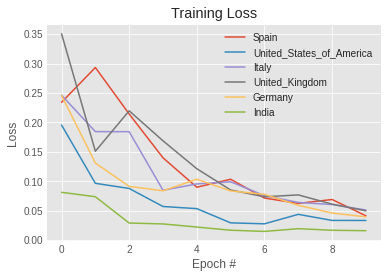

In [20]:
%%time
# epochs = 5
# The RNN architecture
regressorRNN_deaths = Sequential()
# First RNN layer with Dropout regularisation
regressorRNN_deaths.add(SimpleRNN(units=50, return_sequences=True, input_shape=(look_back_deaths,1)))
regressorRNN_deaths.add(Dropout(0.2))
# Second RNN layer
regressorRNN_deaths.add(SimpleRNN(units=50, return_sequences=True))
regressorRNN_deaths.add(Dropout(0.2))
# Third RNN layer
regressorRNN_deaths.add(SimpleRNN(units=50, return_sequences=True))
regressorRNN_deaths.add(Dropout(0.5))
# Fourth RNN layer
regressorRNN_deaths.add(SimpleRNN(units=50))
regressorRNN_deaths.add(Dropout(0.5))
# The output layer
regressorRNN_deaths.add(Dense(units=1))

# Compiling the RNN
regressorRNN_deaths.compile(optimizer='rmsprop', loss='mean_squared_error')
# Fitting to the training set
history_deaths = {}
for country in training_countries:
  history_deaths[country] = []
for epoch in range(epochs):
    for country in training_countries:
        print("Fitting to", country)
        H = regressorRNN_deaths.fit(trainset_deaths[country]["X"], trainset_deaths[country]["y"], epochs=1, batch_size=16)
        history_deaths[country].append(H.history["loss"])
print(history_deaths)

plt.style.use("ggplot")
plt.figure()
for country in training_countries:
  plt.plot(np.arange(0, epochs), history_deaths[country], label=country)
plt.title("Training Loss")
plt.xlabel("Epoch #")
plt.ylabel("Loss")
plt.legend(loc="upper right")

In [0]:
pred_result_cases = {}
for country in training_countries:
    y_true = scaler_cases[country].inverse_transform(testset_cases[country]["y"].reshape(-1,1))
    y_pred = scaler_cases[country].inverse_transform(regressorRNN_cases.predict(testset_cases[country]["X"]))
    MSE = mean_squared_error(y_true, y_pred)
    pred_result_cases[country] = {}
    pred_result_cases[country]["True"] = y_true
    pred_result_cases[country]["Pred"] = y_pred
    
    # plt.figure(figsize=(14,6))
    # plt.title("{} with MSE {:10.4f}".format(country,MSE))
    # plt.plot(y_true, color='green')
    # plt.plot(y_pred, color='blue')
    # plt.legend(["True", "Predicted"])

pred_result_deaths = {}
for country in training_countries:
    y_true = scaler_deaths[country].inverse_transform(testset_deaths[country]["y"].reshape(-1,1))
    y_pred = scaler_deaths[country].inverse_transform(regressorRNN_deaths.predict(testset_deaths[country]["X"]))
    MSE = mean_squared_error(y_true, y_pred)
    pred_result_deaths[country] = {}
    pred_result_deaths[country]["True"] = y_true
    pred_result_deaths[country]["Pred"] = y_pred
    
    # plt.figure(figsize=(14,6))
    # plt.title("{} with MSE {:10.4f}".format(country,MSE))
    # plt.plot(y_true, color='green')
    # plt.plot(y_pred, color='blue')
    # plt.legend(["True", "Predicted"])

MSE with Lag    : 0.7533424858459106
MSE with Lag    : 29.718383048140144
MSE with Lag    : 0.3247284225928611
MSE with Lag    : 1.4808084701430266
MSE with Lag    : 1.1739678834281493
MSE with Lag    : 0.11494670890857189


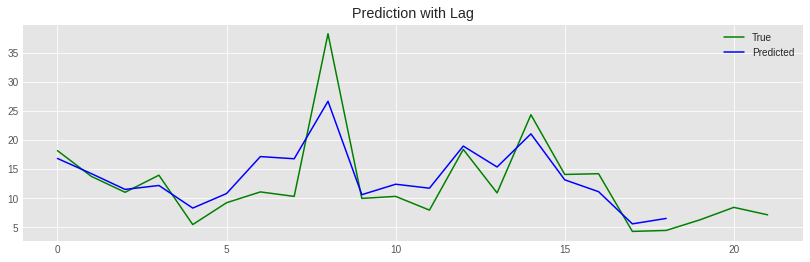

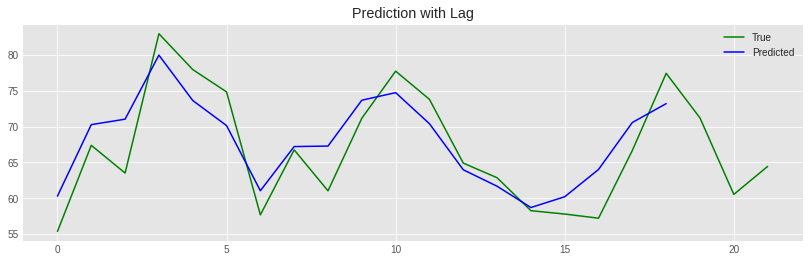

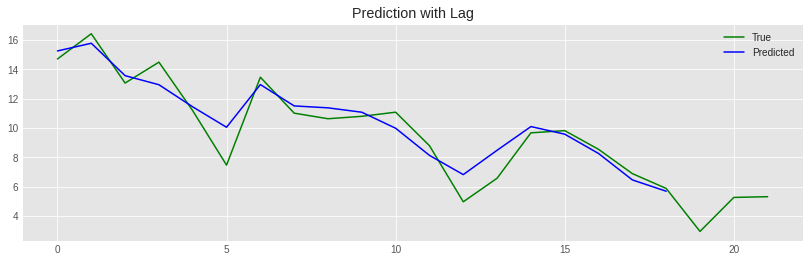

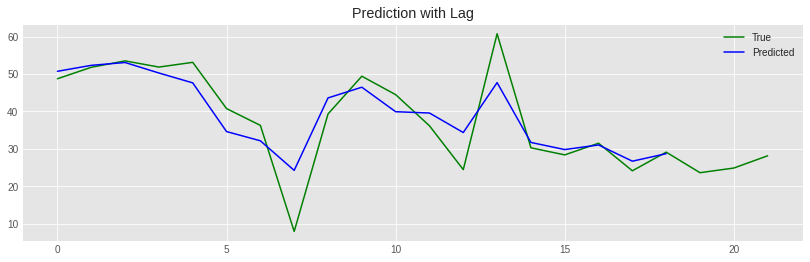

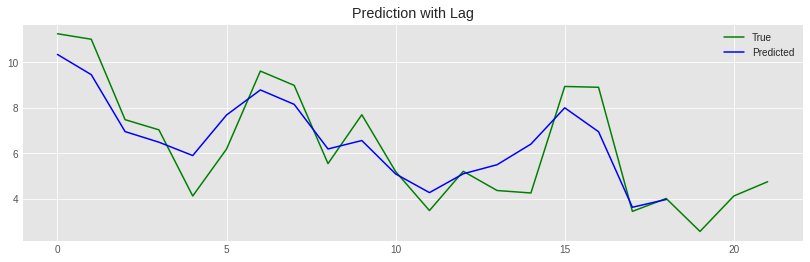

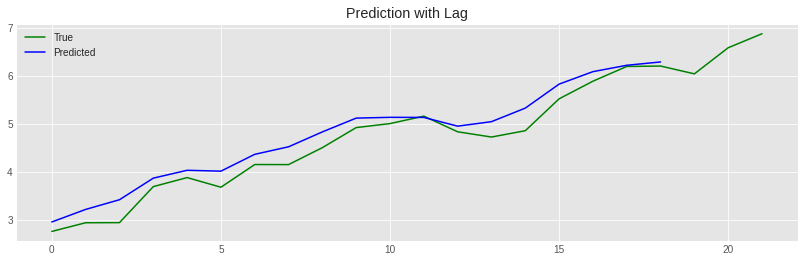

In [22]:
total_error["RNN"]["Cases"] = 0
for country in training_countries:
  total_error["RNN"]["Cases"] += lagging(pred_result_cases[country], -3)

MSE with Lag    : 1.2422444050312331
MSE with Lag    : 0.19254261179467416
MSE with Lag    : 0.2569651162743658
MSE with Lag    : 0.07781685558168397
MSE with Lag    : 0.026658325371297777
MSE with Lag    : 5.456341881177675e-05


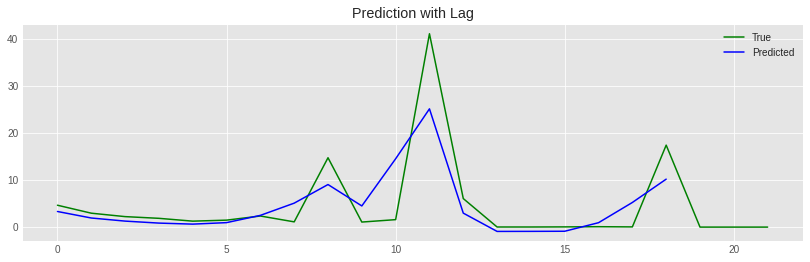

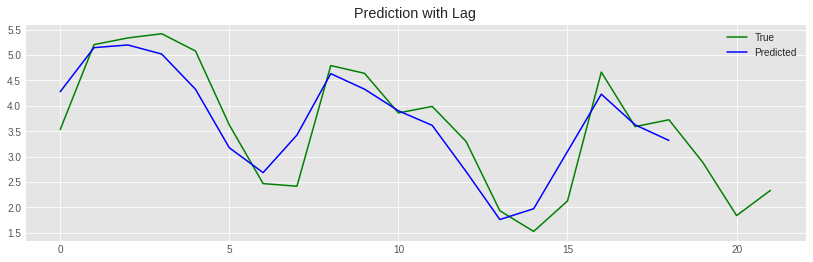

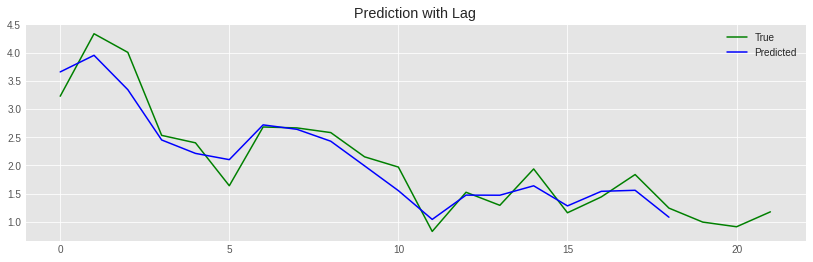

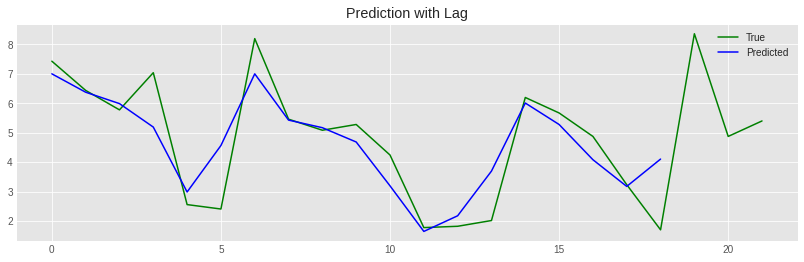

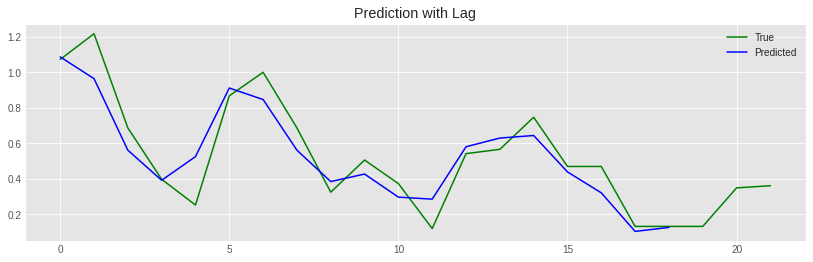

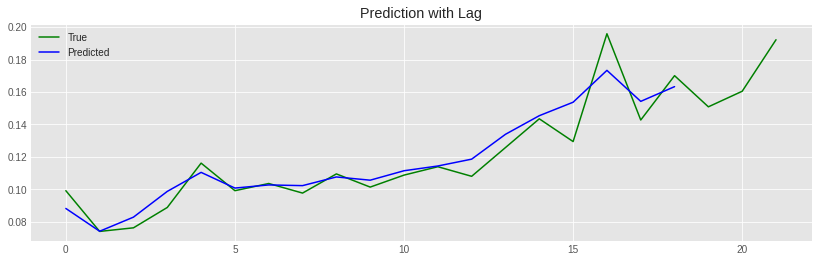

In [23]:
total_error["RNN"]["Deaths"] = 0
for country in training_countries:
  total_error["RNN"]["Deaths"] +=lagging(pred_result_deaths[country], -3)

Fitting to Spain
Epoch 1/1
97/97 [==============================] - 1s 12ms/step - loss: 0.1196
Fitting to United_States_of_America
Epoch 1/1
97/97 [==============================] - 0s 2ms/step - loss: 0.0734
Fitting to Italy
Epoch 1/1
97/97 [==============================] - 0s 2ms/step - loss: 0.0472
Fitting to United_Kingdom
Epoch 1/1
97/97 [==============================] - 0s 2ms/step - loss: 0.0365
Fitting to Germany
Epoch 1/1
97/97 [==============================] - 0s 2ms/step - loss: 0.0516
Fitting to India
Epoch 1/1
97/97 [==============================] - 0s 2ms/step - loss: 0.0144
Fitting to Spain
Epoch 1/1
97/97 [==============================] - 0s 2ms/step - loss: 0.0309
Fitting to United_States_of_America
Epoch 1/1
97/97 [==============================] - 0s 2ms/step - loss: 0.0274
Fitting to Italy
Epoch 1/1
97/97 [==============================] - 0s 2ms/step - loss: 0.0226
Fitting to United_Kingdom
Epoch 1/1
97/97 [==============================] - 0s 2ms/step - loss

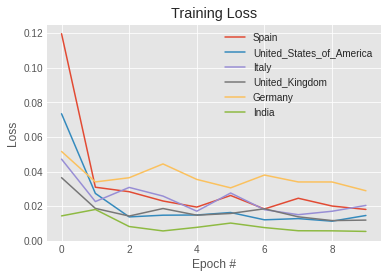

In [24]:
%%time
epochs = 10
# The LSTM architecture
regressor_cases = Sequential()
# First LSTM layer with Dropout regularisation
regressor_cases.add(LSTM(units=50, return_sequences=True, input_shape=(look_back_cases,1)))
regressor_cases.add(Dropout(0.2))
# Second LSTM layer
regressor_cases.add(LSTM(units=50, return_sequences=True))
regressor_cases.add(Dropout(0.2))
# Third LSTM layer
regressor_cases.add(LSTM(units=50, return_sequences=True))
regressor_cases.add(Dropout(0.5))
# Fourth LSTM layer
regressor_cases.add(LSTM(units=50))
regressor_cases.add(Dropout(0.5))
# The output layer
regressor_cases.add(Dense(units=1))

# Compiling the RNN
regressor_cases.compile(optimizer='rmsprop', loss='mean_squared_error')
# Fitting to the training set
history_cases = {}
for country in training_countries:
  history_cases[country] = []
for epoch in range(epochs):
    for country in training_countries:
        print("Fitting to", country)
        H = regressor_cases.fit(trainset_cases[country]["X"], trainset_cases[country]["y"], epochs=1, batch_size=16)
        history_cases[country].append(H.history["loss"])
print(history_cases)


plt.style.use("ggplot")
plt.figure()
for country in training_countries:
  plt.plot(np.arange(0, epochs), history_cases[country], label=country)
plt.title("Training Loss")
plt.xlabel("Epoch #")
plt.ylabel("Loss")
plt.legend(loc="upper right")

Fitting to Spain
Epoch 1/1
97/97 [==============================] - 1s 12ms/step - loss: 0.1591
Fitting to United_States_of_America
Epoch 1/1
97/97 [==============================] - 0s 2ms/step - loss: 0.0383
Fitting to Italy
Epoch 1/1
97/97 [==============================] - 0s 2ms/step - loss: 0.0900
Fitting to United_Kingdom
Epoch 1/1
97/97 [==============================] - 0s 2ms/step - loss: 0.0675
Fitting to Germany
Epoch 1/1
97/97 [==============================] - 0s 2ms/step - loss: 0.0508
Fitting to India
Epoch 1/1
97/97 [==============================] - 0s 2ms/step - loss: 0.0217
Fitting to Spain
Epoch 1/1
97/97 [==============================] - 0s 2ms/step - loss: 0.0397
Fitting to United_States_of_America
Epoch 1/1
97/97 [==============================] - 0s 2ms/step - loss: 0.0207
Fitting to Italy
Epoch 1/1
97/97 [==============================] - 0s 2ms/step - loss: 0.0235
Fitting to United_Kingdom
Epoch 1/1
97/97 [==============================] - 0s 2ms/step - loss

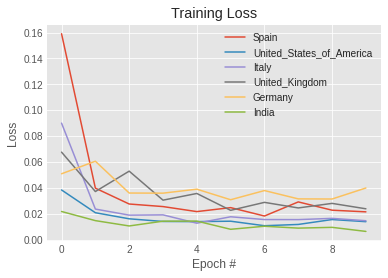

In [25]:
%%time
# epochs = 5
# The LSTM architecture
regressor_deaths = Sequential()
# First LSTM layer with Dropout regularisation
regressor_deaths.add(LSTM(units=50, return_sequences=True, input_shape=(look_back_deaths,1)))
regressor_deaths.add(Dropout(0.2))
# Second LSTM layer
regressor_deaths.add(LSTM(units=50, return_sequences=True))
regressor_deaths.add(Dropout(0.2))
# Third LSTM layer
regressor_deaths.add(LSTM(units=50, return_sequences=True))
regressor_deaths.add(Dropout(0.5))
# Fourth LSTM layer
regressor_deaths.add(LSTM(units=50))
regressor_deaths.add(Dropout(0.5))
# The output layer
regressor_deaths.add(Dense(units=1))

# Compiling the RNN
regressor_deaths.compile(optimizer='rmsprop', loss='mean_squared_error')
# Fitting to the training set
history_deaths = {}
for country in training_countries:
  history_deaths[country] = []
for epoch in range(epochs):
    for country in training_countries:
        print("Fitting to", country)
        H = regressor_deaths.fit(trainset_deaths[country]["X"], trainset_deaths[country]["y"], epochs=1, batch_size=16)
        history_deaths[country].append(H.history["loss"])
print(history_deaths)

plt.style.use("ggplot")
plt.figure()
for country in training_countries:
  plt.plot(np.arange(0, epochs), history_deaths[country], label=country)
plt.title("Training Loss")
plt.xlabel("Epoch #")
plt.ylabel("Loss")
plt.legend(loc="upper right")

In [0]:
pred_result_cases = {}
for country in training_countries:
    y_true = scaler_cases[country].inverse_transform(testset_cases[country]["y"].reshape(-1,1))
    y_pred = scaler_cases[country].inverse_transform(regressor_cases.predict(testset_cases[country]["X"]))
    MSE = mean_squared_error(y_true, y_pred)
    pred_result_cases[country] = {}
    pred_result_cases[country]["True"] = y_true
    pred_result_cases[country]["Pred"] = y_pred
    
    # plt.figure(figsize=(14,6))
    # plt.title("{} with MSE {:10.4f}".format(country,MSE))
    # plt.plot(y_true, color='green')
    # plt.plot(y_pred, color='blue')
    # plt.legend(["True", "Predicted"])

pred_result_deaths = {}
for country in training_countries:
    y_true = scaler_deaths[country].inverse_transform(testset_deaths[country]["y"].reshape(-1,1))
    y_pred = scaler_deaths[country].inverse_transform(regressor_deaths.predict(testset_deaths[country]["X"]))
    MSE = mean_squared_error(y_true, y_pred)
    pred_result_deaths[country] = {}
    pred_result_deaths[country]["True"] = y_true
    pred_result_deaths[country]["Pred"] = y_pred
    
    # plt.figure(figsize=(14,6))
    # plt.title("{} with MSE {:10.4f}".format(country,MSE))
    # plt.plot(y_true, color='green')
    # plt.plot(y_pred, color='blue')
    # plt.legend(["True", "Predicted"])

MSE with Lag    : 10.177512316861826
MSE with Lag    : 42.7194455240519
MSE with Lag    : 4.435503276358566
MSE with Lag    : 10.278149403277462
MSE with Lag    : 0.32236722526788036
MSE with Lag    : 0.28346386730593726


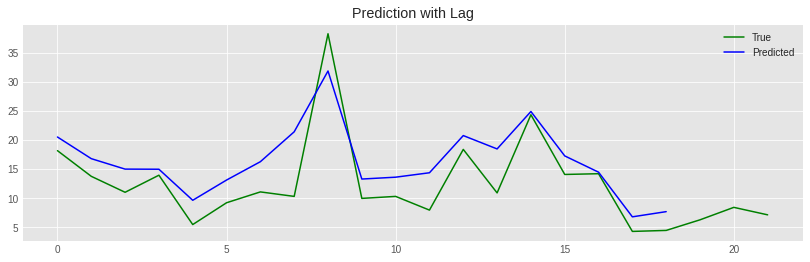

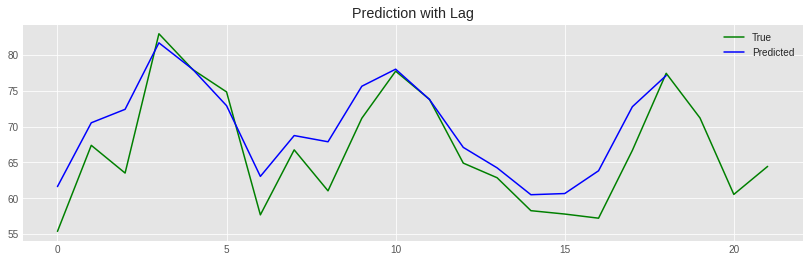

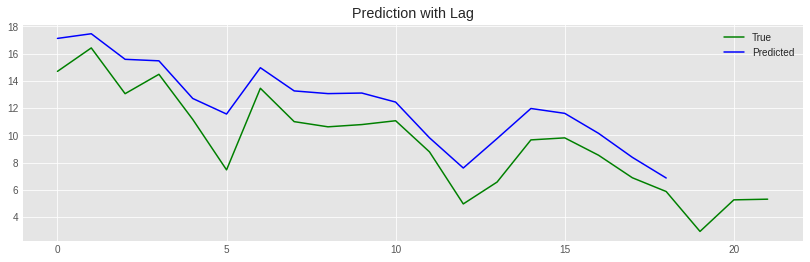

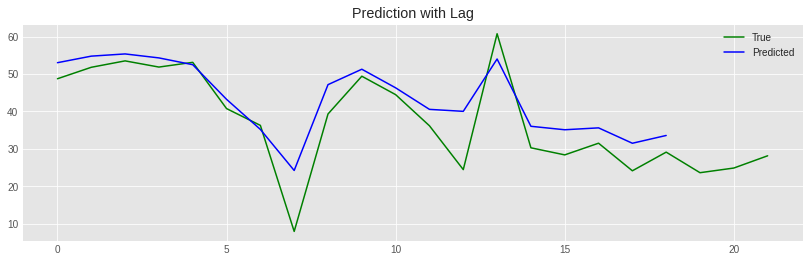

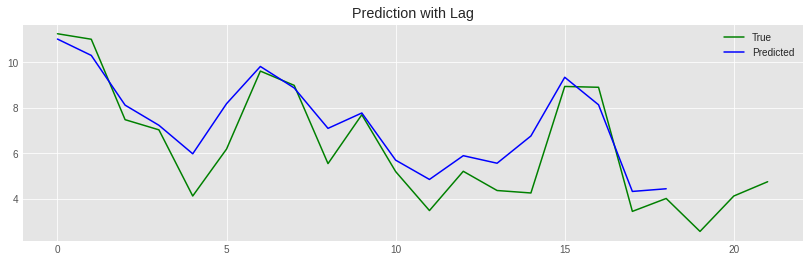

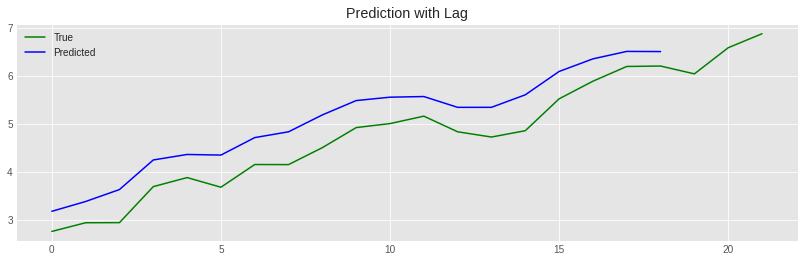

In [27]:
total_error["LSTM"]["Cases"] = 0
for country in training_countries:
  total_error["LSTM"]["Cases"] += lagging(pred_result_cases[country], -3)

MSE with Lag    : 3.113666621126017
MSE with Lag    : 0.30976550981433054
MSE with Lag    : 0.41643790997528773
MSE with Lag    : 0.3900694396218006
MSE with Lag    : 0.037196149041747964
MSE with Lag    : 4.5801563639088606e-05


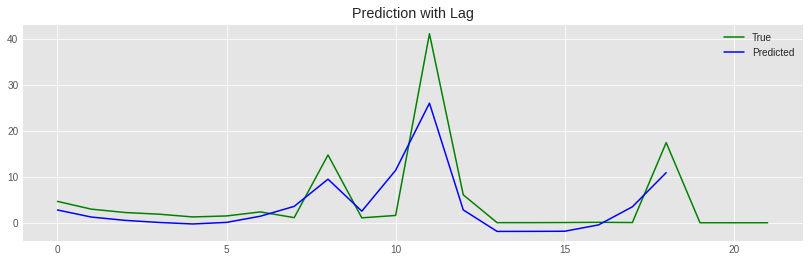

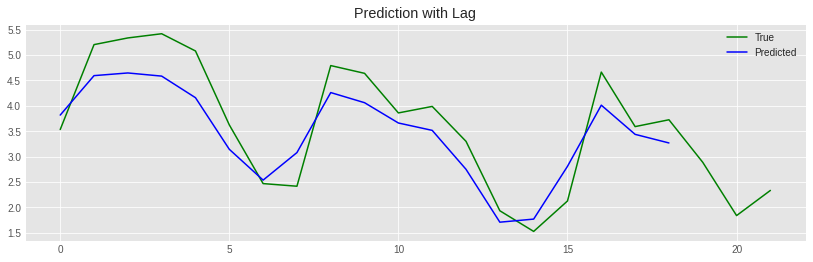

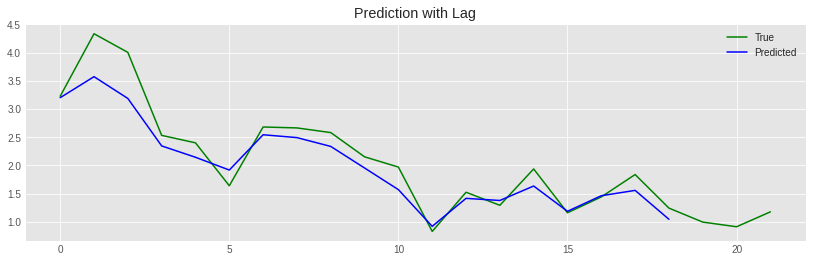

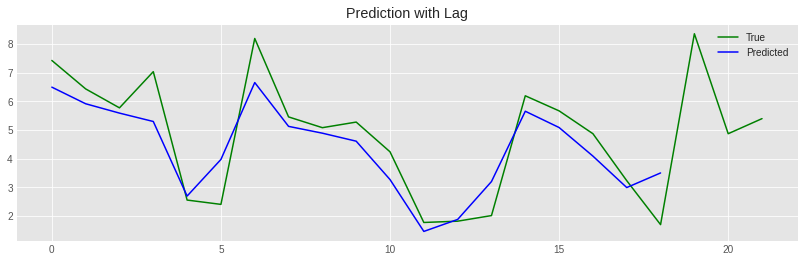

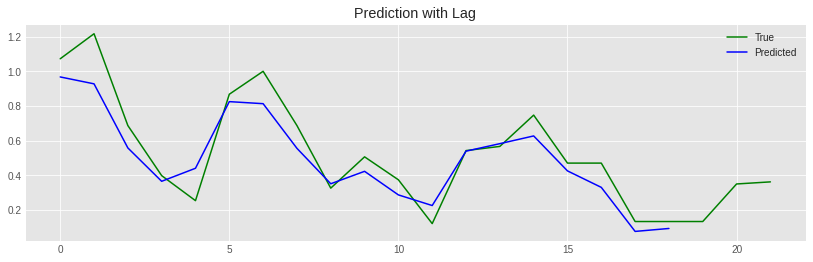

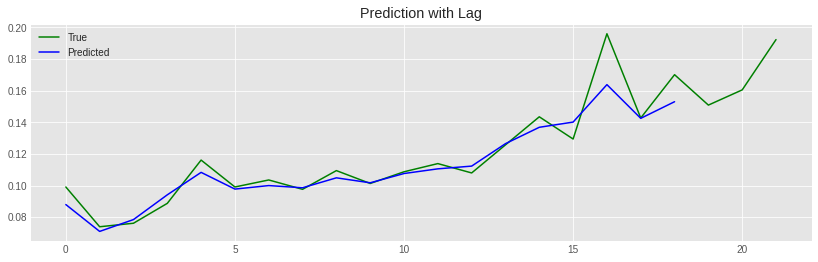

In [28]:
total_error["LSTM"]["Deaths"] = 0
for country in training_countries:
  total_error["LSTM"]["Deaths"] +=lagging(pred_result_deaths[country], -3)

Fitting to Spain
Epoch 1/1
97/97 [==============================] - 1s 14ms/step - loss: 0.1261
Fitting to United_States_of_America
Epoch 1/1
97/97 [==============================] - 0s 2ms/step - loss: 0.0880
Fitting to Italy
Epoch 1/1
97/97 [==============================] - 0s 2ms/step - loss: 0.0999
Fitting to United_Kingdom
Epoch 1/1
97/97 [==============================] - 0s 2ms/step - loss: 0.0718
Fitting to Germany
Epoch 1/1
97/97 [==============================] - 0s 2ms/step - loss: 0.0929
Fitting to India
Epoch 1/1
97/97 [==============================] - 0s 2ms/step - loss: 0.0624
Fitting to Spain
Epoch 1/1
97/97 [==============================] - 0s 2ms/step - loss: 0.0858
Fitting to United_States_of_America
Epoch 1/1
97/97 [==============================] - 0s 2ms/step - loss: 0.0666
Fitting to Italy
Epoch 1/1
97/97 [==============================] - 0s 2ms/step - loss: 0.0786
Fitting to United_Kingdom
Epoch 1/1
97/97 [==============================] - 0s 2ms/step - loss

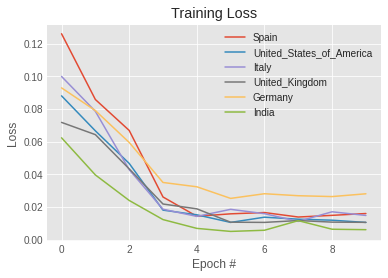

In [29]:
%%time
# epochs = 5
# The GRU architecture
regressorGRU_cases = Sequential()
# First GRU layer with Dropout regularisation
regressorGRU_cases.add(GRU(units=50, return_sequences=True, input_shape=(look_back_cases,1), activation='tanh'))
regressorGRU_cases.add(Dropout(0.2))
# Second GRU layer
regressorGRU_cases.add(GRU(units=50, return_sequences=True, input_shape=(look_back_cases,1), activation='tanh'))
regressorGRU_cases.add(Dropout(0.2))
# Third GRU layer
regressorGRU_cases.add(GRU(units=50, return_sequences=True, input_shape=(look_back_cases,1), activation='tanh'))
regressorGRU_cases.add(Dropout(0.2))
# Fourth GRU layer
regressorGRU_cases.add(GRU(units=50, activation='tanh'))
regressorGRU_cases.add(Dropout(0.2))
# The output layer
regressorGRU_cases.add(Dense(units=1))
# Compiling the RNN
regressorGRU_cases.compile(optimizer=SGD(lr=0.01, decay=1e-7, momentum=0.9, nesterov=False),loss='mean_squared_error')
# Fitting to the training set
history_cases = {}
for country in training_countries:
  history_cases[country] = []
for epoch in range(epochs):
    for country in training_countries:
        print("Fitting to", country)
        H = regressorGRU_cases.fit(trainset_cases[country]["X"], trainset_cases[country]["y"], epochs=1, batch_size=16)
        history_cases[country].append(H.history["loss"])
print(history_cases)


plt.style.use("ggplot")
plt.figure()
for country in training_countries:
  plt.plot(np.arange(0, epochs), history_cases[country], label=country)
plt.title("Training Loss")
plt.xlabel("Epoch #")
plt.ylabel("Loss")
plt.legend(loc="upper right")

Fitting to Spain
Epoch 1/1
97/97 [==============================] - 1s 14ms/step - loss: 0.1451
Fitting to United_States_of_America
Epoch 1/1
97/97 [==============================] - 0s 2ms/step - loss: 0.0932
Fitting to Italy
Epoch 1/1
97/97 [==============================] - 0s 2ms/step - loss: 0.0997
Fitting to United_Kingdom
Epoch 1/1
97/97 [==============================] - 0s 2ms/step - loss: 0.1093
Fitting to Germany
Epoch 1/1
97/97 [==============================] - 0s 2ms/step - loss: 0.0828
Fitting to India
Epoch 1/1
97/97 [==============================] - 0s 3ms/step - loss: 0.0284
Fitting to Spain
Epoch 1/1
97/97 [==============================] - 0s 2ms/step - loss: 0.1350
Fitting to United_States_of_America
Epoch 1/1
97/97 [==============================] - 0s 2ms/step - loss: 0.0784
Fitting to Italy
Epoch 1/1
97/97 [==============================] - 0s 2ms/step - loss: 0.0902
Fitting to United_Kingdom
Epoch 1/1
97/97 [==============================] - 0s 3ms/step - loss

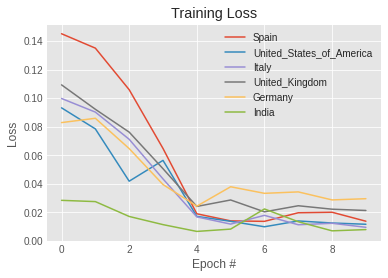

In [30]:
%%time
# epochs = 5
# The GRU architecture
regressorGRU_deaths = Sequential()
# First GRU layer with Dropout regularisation
regressorGRU_deaths.add(GRU(units=50, return_sequences=True, input_shape=(look_back_deaths,1), activation='tanh'))
regressorGRU_deaths.add(Dropout(0.2))
# Second GRU layer
regressorGRU_deaths.add(GRU(units=50, return_sequences=True, input_shape=(look_back_deaths,1), activation='tanh'))
regressorGRU_deaths.add(Dropout(0.2))
# Third GRU layer
regressorGRU_deaths.add(GRU(units=50, return_sequences=True, input_shape=(look_back_deaths,1), activation='tanh'))
regressorGRU_deaths.add(Dropout(0.2))
# Fourth GRU layer
regressorGRU_deaths.add(GRU(units=50, activation='tanh'))
regressorGRU_deaths.add(Dropout(0.2))
# The output layer
regressorGRU_deaths.add(Dense(units=1))
# Compiling the RNN
regressorGRU_deaths.compile(optimizer=SGD(lr=0.01, decay=1e-7, momentum=0.9, nesterov=False),loss='mean_squared_error')
# Fitting to the training set
history_deaths = {}
for country in training_countries:
  history_deaths[country] = []
for epoch in range(epochs):
    for country in training_countries:
        print("Fitting to", country)
        H = regressorGRU_deaths.fit(trainset_deaths[country]["X"], trainset_deaths[country]["y"], epochs=1, batch_size=16)
        history_deaths[country].append(H.history["loss"])
print(history_deaths)


plt.style.use("ggplot")
plt.figure()
for country in training_countries:
  plt.plot(np.arange(0, epochs), history_deaths[country], label=country)
plt.title("Training Loss")
plt.xlabel("Epoch #")
plt.ylabel("Loss")
plt.legend(loc="upper right")

In [0]:
pred_result_cases = {}
for country in training_countries:
    y_true = scaler_cases[country].inverse_transform(testset_cases[country]["y"].reshape(-1,1))
    y_pred = scaler_cases[country].inverse_transform(regressorGRU_cases.predict(testset_cases[country]["X"]))
    MSE = mean_squared_error(y_true, y_pred)
    pred_result_cases[country] = {}
    pred_result_cases[country]["True"] = y_true
    pred_result_cases[country]["Pred"] = y_pred
    
    # plt.figure(figsize=(14,6))
    # plt.title("{} with MSE {:10.4f}".format(country,MSE))
    # plt.plot(y_true, color='green')
    # plt.plot(y_pred, color='blue')
    # plt.legend(["True", "Predicted"])

pred_result_deaths = {}
for country in training_countries:
    y_true = scaler_deaths[country].inverse_transform(testset_deaths[country]["y"].reshape(-1,1))
    y_pred = scaler_deaths[country].inverse_transform(regressorGRU_deaths.predict(testset_deaths[country]["X"]))
    MSE = mean_squared_error(y_true, y_pred)
    pred_result_deaths[country] = {}
    pred_result_deaths[country]["True"] = y_true
    pred_result_deaths[country]["Pred"] = y_pred
    
    # plt.figure(figsize=(14,6))
    # plt.title("{} with MSE {:10.4f}".format(country,MSE))
    # plt.plot(y_true, color='green')
    # plt.plot(y_pred, color='blue')
    # plt.legend(["True", "Predicted"])

MSE with Lag    : 2.674182330406516
MSE with Lag    : 36.87646830760502
MSE with Lag    : 1.3745221027253376
MSE with Lag    : 6.683622518421941
MSE with Lag    : 2.6004712057384585
MSE with Lag    : 0.12826941469422562


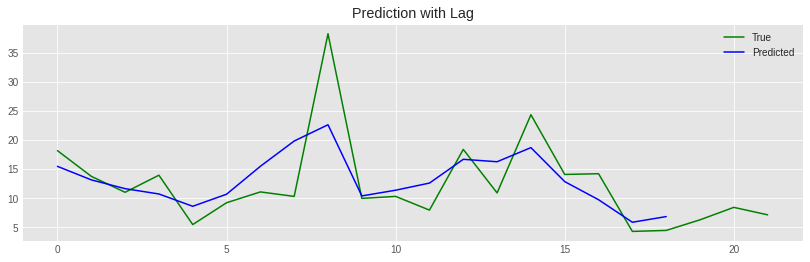

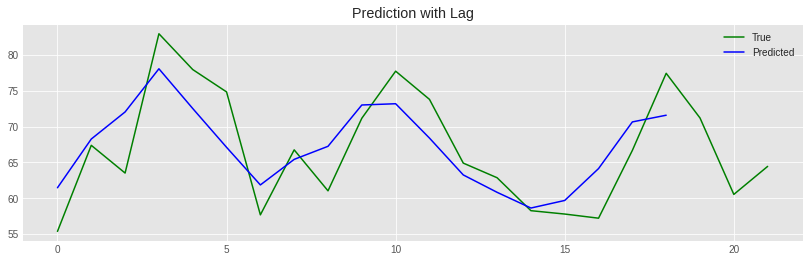

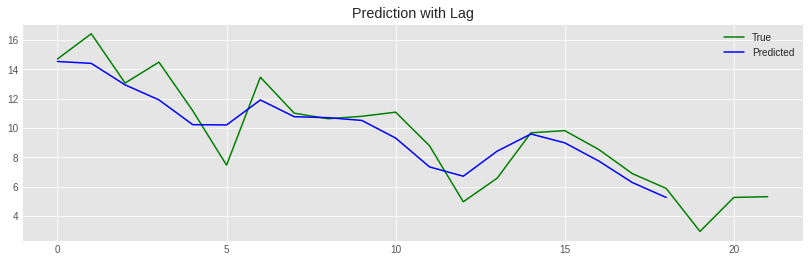

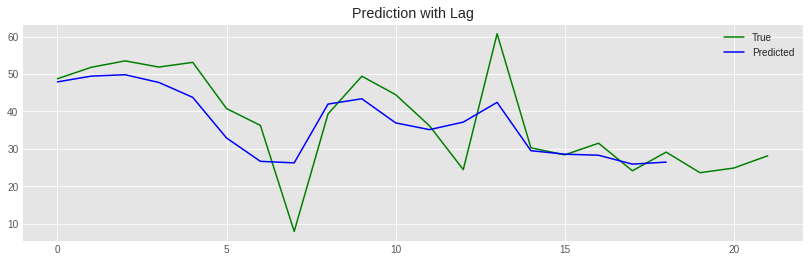

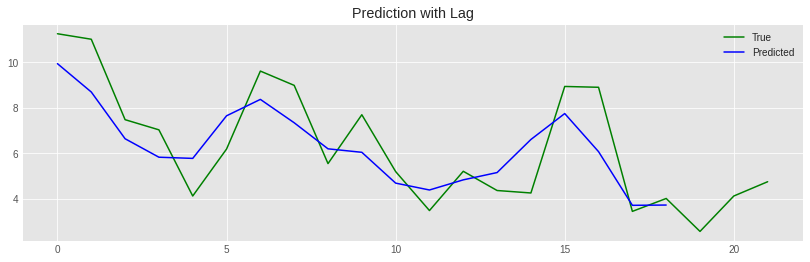

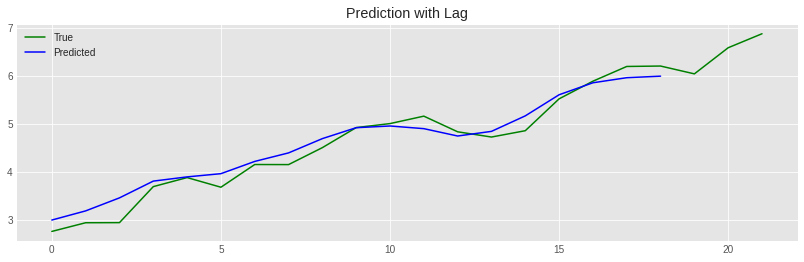

In [32]:
total_error["GRU"]["Cases"] = 0
for country in training_countries:
  total_error["GRU"]["Cases"] +=lagging(pred_result_cases[country], -3)

MSE with Lag    : 2.704181522761495
MSE with Lag    : 0.2543345893235798
MSE with Lag    : 0.4738647673772503
MSE with Lag    : 0.2752224909362205
MSE with Lag    : 0.05279529972208206
MSE with Lag    : 0.00015533535556796842


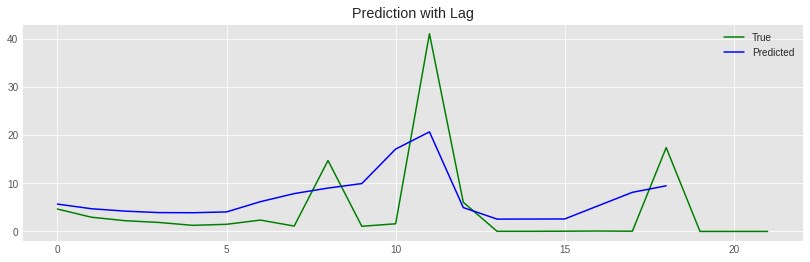

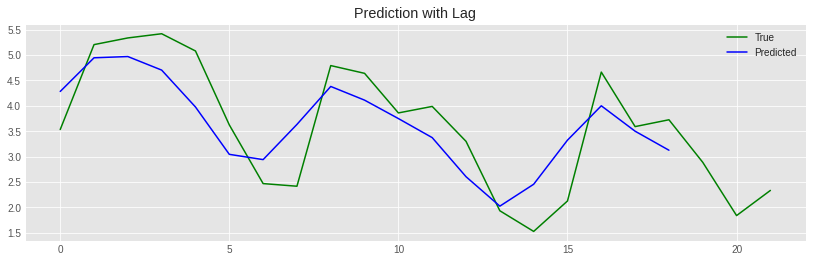

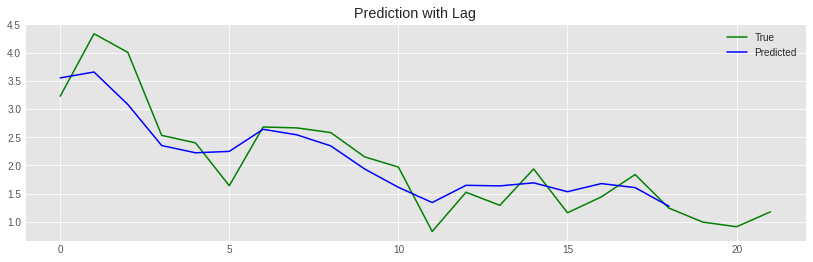

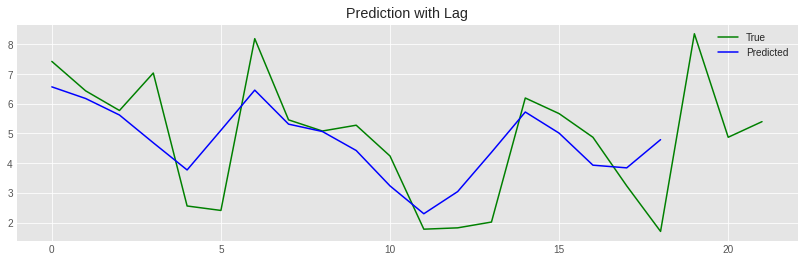

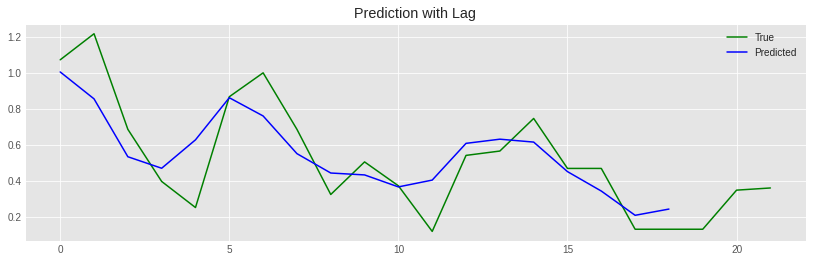

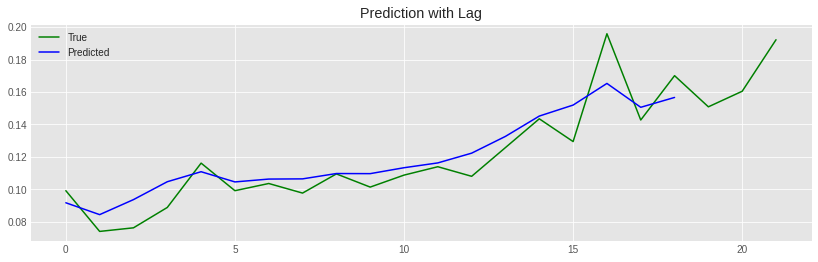

In [33]:
total_error["GRU"]["Deaths"] = 0
for country in training_countries:
  total_error["GRU"]["Deaths"] +=lagging(pred_result_deaths[country], -3)

In [34]:
for model_type in model_types:
  print("{0:5s}".format(model_type), total_error[model_type])

RNN   {'Cases': 33.56617701905866, 'Deaths': 1.7962818774720668}
LSTM  {'Cases': 68.21644161312358, 'Deaths': 4.267181431142822}
GRU   {'Cases': 50.3375358795915, 'Deaths': 3.760554005476196}
NODE  {'Cases': 0, 'Deaths': 0}


In [0]:
trainset_cases = {}
testset_cases = {}
look_back_cases = 1
for country in training_countries:
    trainset_cases[country] = {}
    X_train = []
    y_train = []
    for i in range(look_back_cases,100):
        X_train.append(transform_train_cases[country][i-look_back_cases:i,0])
        y_train.append(transform_train_cases[country][i,0])
    X_train, y_train = np.array(X_train), np.array(y_train)
    trainset_cases[country]["X"] = X_train
    trainset_cases[country]["y"] = np.reshape(y_train,(y_train.shape[0],1))
    
    testset_cases[country] = {}
    X_test = []
    y_test = []    
    for i in range(look_back_cases, 25):
        X_test.append(transform_test_cases[country][i-look_back_cases:i,0])
        y_test.append(transform_test_cases[country][i,0])
    X_test, y_test = np.array(X_test), np.array(y_test)
    testset_cases[country]["X"] = X_test
    testset_cases[country]["y"] = np.reshape(y_test,(y_test.shape[0],1))

trainset_deaths = {}
testset_deaths = {}
look_back_deaths = 1
for country in training_countries:
    trainset_deaths[country] = {}
    X_train = []
    y_train = []
    for i in range(look_back_deaths,100):
        X_train.append(transform_train_deaths[country][i-look_back_deaths:i,0])
        y_train.append(transform_train_deaths[country][i,0])
    X_train, y_train = np.array(X_train), np.array(y_train)
    trainset_deaths[country]["X"] = X_train
    trainset_deaths[country]["y"] = np.reshape(y_train,(y_train.shape[0],1))
    
    testset_deaths[country] = {}
    X_test = []
    y_test = []    
    for i in range(look_back_deaths, 25):
        X_test.append(transform_test_deaths[country][i-look_back_deaths:i,0])
        y_test.append(transform_test_deaths[country][i,0])
    X_test, y_test = np.array(X_test), np.array(y_test)
    testset_deaths[country]["X"] = X_test
    testset_deaths[country]["y"] = np.reshape(y_test,(y_test.shape[0],1))

In [0]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
from torch.optim.lr_scheduler import StepLR, MultiStepLR

In [0]:
def norm(dim):
    return nn.GroupNorm(min(32, dim), dim)
    
def zip_map(zipped, update_op):
    return [update_op(*elems) for elems in zipped]

def euler_update(h_list, dh_list, dt):
    return zip_map(zip(h_list, dh_list), lambda h, dh: h + dt * dh)

def euler_step(func, dt, state):
    return euler_update(state, func(state), dt)

def rk2_step(func, dt, state, **kwargs):
    k1 = func(state, **kwargs)
    k2 = func(euler_update(state, k1, dt), **kwargs)
    return zip_map(zip(state, k1, k2),
                   lambda h, dk1, dk2: h + dt * (dk1 + dk2) / 2)

def rk4_step(func, dt, state, **kwargs):
    k1 = func(state, **kwargs)
    k2 = func(euler_update(state, k1, dt / 2), **kwargs)
    k3 = func(euler_update(state, k2, dt / 2), **kwargs)
    k4 = func(euler_update(state, k3, dt), **kwargs)

    return zip_map(
        zip(state, k1, k2, k3, k4), lambda h, dk1, dk2, dk3, dk4: h + dt * ( dk1 + 2 * dk2 + 2 * dk3 + dk4) / 6,)
    
def forward_dynamics(state, nnet):
    t, y = state
    return [1.0, nnet(t, y)]

def backward_dynamics(state, nnet):
    with torch.set_grad_enabled(True):
        t, ht, at = state[0], state[1], state[2]
        ht = ht.detach()
        ht.requires_grad_(True)
        ht_new = nnet(t, ht)
        gradients = torch.autograd.grad(ht_new, [ht] + [w for w in nnet.parameters()], at, allow_unused=True, retain_graph=True)
    return [1.0, ht_new, *gradients]

class NeuralODEFunction(torch.autograd.Function):
    @staticmethod
    def forward(ctx, input, nnet, solver, t, *params):
        delta_t = t[1:] - t[:-1]

        ctx.nnet = nnet
        ctx.solver = solver
        ctx.delta_t = delta_t

        state = [0, input]
        for dt in delta_t:
            state = solver(func=forward_dynamics, dt=float(dt), state=state, nnet=nnet)
        output = state[1]
        
        ctx.save_for_backward(input, output)
        return output

    @staticmethod
    def backward(ctx, output_gradients):
        input, output = ctx.saved_tensors
        nnet = ctx.nnet
        solver = ctx.solver
        delta_t = ctx.delta_t
        params = nnet.parameters()

        grad_weights = []
        for p in params:
            grad_weights.append(torch.zeros_like(p))

        state = [1, output, output_gradients, *grad_weights]

        for i, dt in enumerate(delta_t):
            state = solver(func=backward_dynamics, dt=float(dt), state=state, nnet=nnet)

        # input = state[1]
        grad_input = state[2]
        grad_weights = state[3:]
        return (grad_input, None, None, None, *grad_weights)

class NeuralODE(nn.Module):
    def __init__(self, model, solver=rk4_step, t=np.linspace(0,99,99)):
      super().__init__()
      self.t = t
      self.model = model
      self.solver = solver
      self.params = [w for w in model.parameters()]

    def forward(self, input):
      return NeuralODEFunction.apply(input, self.model, self.solver, self.t, *self.params)

class ODEfunc(nn.Module):
    def __init__(self, dim):
        super(ODEfunc, self).__init__()
        self.norm1 = norm(dim)
        self.relu = nn.ReLU(inplace=True)
        self.conv1 = ConcatConv2d(dim, dim, 3, 1, 1)
        self.norm2 = norm(dim)
        self.conv2 = ConcatConv2d(dim, dim, 3, 1, 1)
        self.norm3 = norm(dim)
        self.nfe = 0

    def forward(self, t, x):
        self.nfe += 1
        out = self.norm1(x)
        out = self.relu(out)
        out = self.conv1(t, out)
        out = self.norm2(out)
        out = self.relu(out)
        out = self.conv2(t, out)
        out = self.norm3(out)
        return out

class arguments:
  def __init__(self):
    self.batch_size=64
    self.test_batch_size=1000
    self.epochs=15
    self.lr=1.0
    self.gamma=0.7
    self.seed=1
    self.log_interval=5
    
args=arguments()

device = torch.device("cpu")

#kwargs = {'num_workers': 1, 'pin_memory': True}



In [0]:
#trying my own model
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(1, 64)
        self.fc2 = nn.Linear(64, 64)
        self.fc3 = nn.Linear(64, 64)
        self.fc4 = nn.Linear(64, 64)
        self.fc5 = nn.Linear(64, 1)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = F.relu(self.fc4(x))
        x = self.fc5(x)
        return x

model = Net().to(device)


In [0]:
for country in training_countries:
  for x_or_y in ["X","y"]:
    trainset_cases[country][x_or_y]=np.float32(trainset_cases[country][x_or_y])
    testset_cases[country][x_or_y]=np.float32(testset_cases[country][x_or_y])

    trainset_deaths[country][x_or_y]=np.float32(trainset_deaths[country][x_or_y])
    testset_deaths[country][x_or_y]=np.float32(testset_deaths[country][x_or_y])

In [0]:
trainset = dict()
testset = dict()
for country in training_countries:
  trainset_cases[country] = torch.utils.data.DataLoader((trainset_cases[country]["X"], trainset_cases[country]["y"]), batch_size=10, shuffle=False)
  testset_cases[country] = torch.utils.data.DataLoader((testset_cases[country]["X"], testset_cases[country]["y"]), batch_size=10, shuffle=False)
  trainset_deaths[country] = torch.utils.data.DataLoader((trainset_deaths[country]["X"], trainset_deaths[country]["y"]), batch_size=10, shuffle=False)
  testset_deaths[country] = torch.utils.data.DataLoader((testset_deaths[country]["X"], testset_deaths[country]["y"]), batch_size=10, shuffle=False)


Train Epoch: 0
Spain                                         0.0937657579779625
United_States_of_America                      0.08088458329439163
Italy                                         0.12710978090763092
United_Kingdom                                0.08333110064268112
Germany                                       0.11452540010213852
India                                         0.05700254440307617

Train Epoch: 1
Spain                                         0.0937657579779625
United_States_of_America                      0.08088458329439163
Italy                                         0.12710978090763092
United_Kingdom                                0.08333110064268112
Germany                                       0.11452540010213852
India                                         0.05700254440307617

Train Epoch: 2
Spain                                         0.0937657579779625
United_States_of_America                      0.08088458329439163
Italy                          

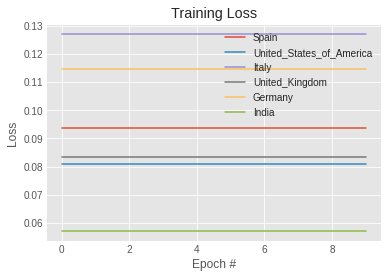

In [41]:
#normal NN training for fun
loss_function = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)
history_NN_cases = {}
for country in training_countries:
  history_NN_cases[country] = []
model_NN_cases = Net().to(device)
# epochs = 15
for epoch in range(epochs): # 3 full passes over the data
    print('\nTrain Epoch: {}'.format(epoch))
    for country in training_countries:  # `data` is a batch of data
        for (x,y) in enumerate(trainset_cases[country]):
            data = y[0]
            target = y[1]
            model_NN_cases.zero_grad()  # sets gradients to 0 before loss calc. You will do this likely every step.
            output = model_NN_cases(data)  # pass in the reshaped batch (recall they are 28x28 atm)
            loss=loss_function(target,output)
            #loss = F.nll_loss(output, y)  # calc and grab the loss value
            loss.backward()  # apply this loss backwards thru the network's parameters
            optimizer.step()  # attempt to optimize weights to account for loss/gradients
        print("{0:45s}".format(country), loss.item())  # print loss. We hope loss (a measure of wrong-ness) declines! 
        history_NN_cases[country].append(loss.item())

plt.style.use("ggplot")
plt.figure()
for country in training_countries:
  plt.plot(np.arange(0, epochs), history_NN_cases[country], label=country)
plt.title("Training Loss")
plt.xlabel("Epoch #")
plt.ylabel("Loss")
plt.legend(loc="upper right")


Train Epoch: 0
Spain                                         0.2065868377685547
United_States_of_America                      0.06594224274158478
Italy                                         0.21282987296581268
United_Kingdom                                0.2044331282377243
Germany                                       0.16028767824172974
India                                         0.051274459809064865

Train Epoch: 1
Spain                                         0.2065868377685547
United_States_of_America                      0.06594224274158478
Italy                                         0.21282987296581268
United_Kingdom                                0.2044331282377243
Germany                                       0.16028767824172974
India                                         0.051274459809064865

Train Epoch: 2
Spain                                         0.2065868377685547
United_States_of_America                      0.06594224274158478
Italy                          

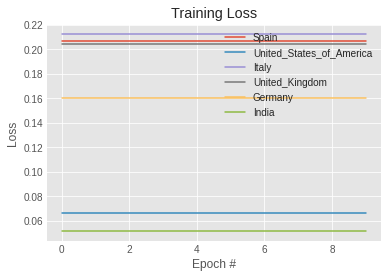

In [42]:
#normal NN training for fun
loss_function = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)
history_NN_deaths = {}
for country in training_countries:
  history_NN_deaths[country] = []
model_NN_deaths = Net().to(device)
# epochs = 15
for epoch in range(epochs): # 3 full passes over the data
    print('\nTrain Epoch: {}'.format(epoch))
    for country in training_countries:  # `data` is a batch of data
        for (x,y) in enumerate(trainset_deaths[country]):
            data = y[0]
            target = y[1]
            model_NN_deaths.zero_grad()  # sets gradients to 0 before loss calc. You will do this likely every step.
            output = model_NN_deaths(data)  # pass in the reshaped batch (recall they are 28x28 atm)
            loss=loss_function(target,output)
            #loss = F.nll_loss(output, y)  # calc and grab the loss value
            loss.backward()  # apply this loss backwards thru the network's parameters
            optimizer.step()  # attempt to optimize weights to account for loss/gradients
        print("{0:45s}".format(country), loss.item())  # print loss. We hope loss (a measure of wrong-ness) declines! 
        history_NN_deaths[country].append(loss.item())

plt.style.use("ggplot")
plt.figure()
for country in training_countries:
  plt.plot(np.arange(0, epochs), history_NN_deaths[country], label=country)
plt.title("Training Loss")
plt.xlabel("Epoch #")
plt.ylabel("Loss")
plt.legend(loc="upper right")

In [0]:
def train(args, model, device, train_loader, optimizer, epoch, country_name, history_dict , op):
  model.train()
  batch_idx = 0
  for (x,y) in enumerate(train_loader):
    data = y[0]
    target = y[1]
    data, target = data.to(device), target.to(device)
    optimizer.zero_grad()
    output = model(data)
    loss = loss_function(output,target)
    loss.backward()
    optimizer.step()
    batch_idx += 1
    print("{0:45s}".format(country), loss.item())
    history_dict[country_name].append(loss.item())
  op[country].append(output.tolist())

def test(args, model, device, test_loader, country_name , op):
  model.eval()
  test_loss = 0
  correct = 0
  with torch.no_grad():
    for data, target in enumerate(test_loader):
      data = target[0]
      target = target[1]
      data, target = data.to(device), target.to(device)
      output = model(data)
      loss = loss_function(output,target)
      test_loss += loss
      pred = output.argmax(dim=1, keepdim=True)  # get the index of the max log-probability
      correct += pred.eq(target.view_as(pred)).sum().item()
  op[country].append(output.tolist())


Train Epoch: 0
Spain                                         0.10359171777963638
United_States_of_America                      0.07650468498468399
Italy                                         0.10688672214746475
United_Kingdom                                0.06815758347511292
Germany                                       0.09368205815553665
India                                         0.05642468109726906

Train Epoch: 1
Spain                                         0.07485733181238174
United_States_of_America                      0.06886164098978043
Italy                                         0.09205444157123566
United_Kingdom                                0.06539171189069748
Germany                                       0.09122345596551895
India                                         0.05577924847602844

Train Epoch: 2
Spain                                         0.07367932796478271
United_States_of_America                      0.06843987852334976
Italy                       

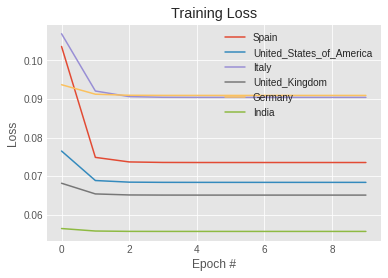

In [59]:
history_cases = {}
op_cases_train = {}
op_cases_test = {}
for country in training_countries:
  history_cases[country] = []
  op_cases_train[country] = []
  op_cases_test[country] = []
# [ADD SINLGE LINE] using NeuralODE to update this network.
model_cases = Net()
loss_function=nn.MSELoss()
# just train as usual, nothing need to change
optimizer = optim.Adadelta(model_cases.parameters(), lr=args.lr)

scheduler = StepLR(optimizer, step_size=1, gamma=args.gamma)
for epoch in range(epochs):
    print('\nTrain Epoch: {}'.format(epoch))
    for country in training_countries:
      train(args, model_cases, device, trainset_cases[country], optimizer, epoch, country, history_cases , op_cases_train)
      test(args, model_cases, device, testset_cases[country], country, op_cases_test)
      scheduler.step()

plt.style.use("ggplot")
plt.figure()
for country in training_countries:
  plt.plot(np.arange(0, epochs), history_cases[country], label=country)
plt.title("Training Loss")
plt.xlabel("Epoch #")
plt.ylabel("Loss")
plt.legend(loc="upper right")

In [65]:
op_cases_train["India"][-1]

[[0.20958063006401062],
 [0.20956948399543762],
 [0.20956948399543762],
 [0.20958063006401062],
 [0.20956948399543762],
 [0.20958063006401062],
 [0.20956948399543762],
 [0.20956948399543762],
 [0.20956948399543762],
 [0.20956948399543762],
 [0.20956948399543762],
 [0.20956948399543762],
 [0.20956948399543762],
 [0.20956948399543762],
 [0.20956948399543762],
 [0.20956948399543762],
 [0.20956948399543762],
 [0.20956948399543762],
 [0.20956948399543762],
 [0.20956948399543762],
 [0.20956948399543762],
 [0.20956948399543762],
 [0.20956948399543762],
 [0.20956948399543762],
 [0.20956948399543762],
 [0.20956948399543762],
 [0.20956948399543762],
 [0.20956948399543762],
 [0.20956948399543762],
 [0.20956948399543762],
 [0.20956948399543762],
 [0.20956948399543762],
 [0.20956948399543762],
 [0.20959177613258362],
 [0.20958063006401062],
 [0.2098132073879242],
 [0.20958063006401062],
 [0.20959177613258362],
 [0.20960292220115662],
 [0.20968058705329895],
 [0.2096363604068756],
 [0.20982426404953

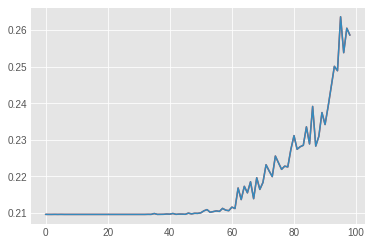

In [66]:
plt.plot(op_cases_train["India"][-1])
plt.plot(op_cases_train["India"][-1])
plt.show()

In [52]:
history_deaths = {}

for country in training_countries:
  history_deaths[country] = []

# [ADD SINLGE LINE] using NeuralODE to update this network.
model_deaths = Net()
loss_function=nn.MSELoss()
# just train as usual, nothing need to change
optimizer = optim.Adadelta(model_deaths.parameters(), lr=args.lr)

scheduler = StepLR(optimizer, step_size=1, gamma=args.gamma)
for epoch in range(epochs):
    print('\nTrain Epoch: {}'.format(epoch))
    for country in training_countries:
      train(args, model_deaths, device, trainset_deaths[country], optimizer, epoch, country, history_deaths)
      test(args, model_deaths, device, testset_deaths[country], country)
      scheduler.step()

plt.style.use("ggplot")
plt.figure()
for country in training_countries:
  plt.plot(np.arange(0, epochs), history_deaths[country], label=country)
plt.title("Training Loss")
plt.xlabel("Epoch #")
plt.ylabel("Loss")
plt.legend(loc="upper right")


Train Epoch: 0


TypeError: ignored